### COT Report data scraper

https://github.com/NDelventhal/cot_reports

In [ ]:
pip install cot_reports  

In [168]:
import pandas as pd
import cot_reports as cot
from matplotlib import pyplot as plt
import numpy as np
import re
%matplotlib widget
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML


### <u> 1. Instructions for using cot_reports </u>


From https://github.com/NDelventhal/cot_reports

#### Example: cot_hist()
df = cot.cot_hist(cot_report_type= 'traders_in_financial_futures_futopt')
#### cot_hist() downloads the historical bulk file for the specified report type, in this example the Traders in Financial Futures Futures-and-Options Combined report. Returns the data as dataframe.

#### Example: cot_year()
df = cot.cot_year(year = 2020, cot_report_type = 'traders_in_financial_futures_fut')
#### cot_year() downloads the single year file of the specified report type and year. Returns the data as dataframe.

#### Example for collecting data of a few years, here from 2017 to 2020, of a specified report:
df = pd.DataFrame()
begin_year = 2017
end_year = 2020
for i in range(begin_year, end_year + 1):
    single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='legacy_futopt')) 
    df = df.append(single_year, ignore_index=True)

#### Example: cot_all()
df = cot.cot_all(cot_report_type='legacy_fut')
#### cot_all() downloads the historical bulk file and all remaining single year files of the specified report type.  Returns the data as dataframe.

### 2. Download and Compile COT Data into a pandas dataframe

In [169]:
def cot_reader (start, end):
    df = pd.DataFrame()
    begin_year = start
    end_year = end
    for i in range(begin_year, end_year + 1):
        single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='legacy_futopt')) 
        df = df.append(single_year, ignore_index=True)
    
    df.rename(columns = {"Market and Exchange Names" : "Market", 
                     "As of Date in Form YYMMDD" : "Datetime", 
                     "Open Interest (All)" : "OI", 
                     "As of Date in Form YYYY-MM-DD" : "Date"}, inplace=True )
    
    df["Datetime"] = pd.to_datetime(df["Datetime"], format = '%y%m%d')
    
    df.sort_values("Datetime", ascending = False, inplace = True)
    
    return df

In [170]:
df = cot_reader(2022, 2023)

Selected: legacy_futopt
Downloaded single year data from: 2022
Selected: legacy_futopt
Downloaded single year data from: 2023


### 3. Create a list of markets to trade 

##### This is based on personal preference, please ignore if you're looking at all markets or edit as you like

In [171]:
keywords = ["gold", "silver", "platinum", "palladium", "copper", "Lithium", "crude", "heating", "oil", "Gas",
"rbob", "brent", "corn", "oat", "wheat", "soy Meal", "soy Oil", "soy bean", "feeder" "Cattle", "lean" "Hogs",
"cocoa", "coffee", "cotton", "sugar",  "E-Mini S&P 500 Futures","E-Mini",
    "Russell",
    "S&P 500",
    "NASDAQ",
    "Dow Jones",
    "Nikkei",
    "Euro Stoxx",
    "FTSE",
    "DAX",
    "CAC",
    "SMI",
    "Hang Seng",
    "Shanghai",
    "Treasury", "Bond",
           ]

In [172]:
unique_markets = []

for keyword in keywords:
    filtered_df = df[df["Market"].str.contains(keyword, case=False)]
    
    unique_values = filtered_df["Market"].unique()
    
    unique_markets.extend(unique_values)
    

In [173]:
unique_markets

['GOLD - COMMODITY EXCHANGE INC.',
 'MICRO GOLD - COMMODITY EXCHANGE INC.',
 'SILVER - COMMODITY EXCHANGE INC.',
 'PLATINUM - NEW YORK MERCANTILE EXCHANGE',
 'PALLADIUM - NEW YORK MERCANTILE EXCHANGE',
 'COPPER- #1 - COMMODITY EXCHANGE INC.',
 'COPPER-GRADE #1 - COMMODITY EXCHANGE INC.',
 'LITHIUM HYDROXIDE - COMMODITY EXCHANGE INC.',
 'CRUDE OIL AVG PRICE OPTIONS - NEW YORK MERCANTILE EXCHANGE',
 'USD Malaysian Crude Palm Oil C - CHICAGO MERCANTILE EXCHANGE',
 'CRUDE OIL CAL SPREAD OPTIONS - NEW YORK MERCANTILE EXCHANGE',
 'WTI FINANCIAL CRUDE OIL - NEW YORK MERCANTILE EXCHANGE',
 'CRUDE DIFF-WCS HOUSTON/WTI 1ST - ICE FUTURES ENERGY DIV',
 'CRUDE OIL, LIGHT SWEET-WTI - ICE FUTURES EUROPE',
 'CRUDE OIL CAL SPREAD OPT FIN - NEW YORK MERCANTILE EXCHANGE',
 'CRUDE DIFF-TMX WCS 1A INDEX - ICE FUTURES ENERGY DIV',
 'CRUDE DIFF-TMX SW 1A INDEX - ICE FUTURES ENERGY DIV',
 'EUR STYLE CRUDE OIL OPTIONS - NEW YORK MERCANTILE EXCHANGE',
 'WTI CRUDE OIL 1ST LINE - ICE FUTURES ENERGY DIV',
 'USD MA

In [174]:
remove_items = [
    'COFFEE CALENDAR SPREAD OPTIONS - ICE FUTURES U.S.',
    'WHEAT-HRW - CHICAGO BOARD OF TRADE',
    'WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE',
    'BLACK SEA WHEAT FINANCIAL - CHICAGO BOARD OF TRADE',
    'CORN CONSECUTIVE CSO - CHICAGO BOARD OF TRADE',
    'CORN CSO - CHICAGO BOARD OF TRADE',
    'MARINE .5% FOB USGC/BRENT 1st - ICE FUTURES ENERGY DIV',
    'GASOLINE CRK-RBOB/BRENT 1st - ICE FUTURES ENERGY DIV',
    'WTI-BRENT SPREAD OPTION - NEW YORK MERCANTILE EXCHANGE',
    'WTI-BRENT CALENDAR - NEW YORK MERCANTILE EXCHANGE',
    'USGC HSFO-PLATTS/BRENT 1ST LN - ICE FUTURES ENERGY DIV',
    'TRANSCONTINENTAL GAS- STATION 85 (ZONE 4) - ICE FUTURES ENERGY DIV',
    'NORTHERN NATURAL GAS - VENTURA (BASIS) - ICE FUTURES ENERGY DIV',
    'NATURAL GAS PIPELINE-TEXOK (BASIS) - ICE FUTURES ENERGY DIV',
    'PANHANDLE EASTERN- POOL GAS (BASIS) - ICE FUTURES ENERGY DIV',
    'PACIFIC GAS TRANSMISSION - MALIN (BASIS) - ICE FUTURES ENERGY DIV',
    'COLUMBIA GAS CO. - TCO POOL (APPALACHIA) (BASIS) - ICE FUTURES ENERGY DIV',
    'NATURAL GAS PIPELINE-MID-CONTINENT POOL PIN (BASIS) - ICE FUTURES ENERGY DIV',
    'NORTHERN NATURAL GAS - DEMARCATION POOL (BASIS) - ICE FUTURES ENERGY DIV',
    'PANHANDLE EASTERN- POOL GAS (INDEX) - ICE FUTURES ENERGY DIV',
    'GULF COAST CBOB GAS A2 PL RBOB - NEW YORK MERCANTILE EXCHANGE',
    'RBOB CALENDAR - NEW YORK MERCANTILE EXCHANGE',
    'ONEOK GAS TRANSPORTATION BASIS - ICE FUTURES ENERGY DIV',
    'NATURAL GAS INDEX: EP SAN JUAN - ICE FUTURES ENERGY DIV',
    'RBOB GASOLINE 1ST LINE - ICE FUTURES ENERGY DIV',
    'NATURAL GAS HENRY LD1 FIXED - ICE FUTURES ENERGY DIV',
    'NATURAL GAS PENULTIMATE ICE - ICE FUTURES ENERGY DIV',
    'GASOLINE BLENDSTOCK (RBOB) - NEW YORK MERCANTILE EXCHANGE',
    'USD Malaysian Crude Palm Oil C - CHICAGO MERCANTILE EXCHANGE',
    'CRUDE OIL CAL SPREAD OPTIONS - NEW YORK MERCANTILE EXCHANGE',
    'CRUDE DIFF-WCS HOUSTON/WTI 1ST - ICE FUTURES ENERGY DIV',
    'CRUDE OIL CAL SPREAD OPT FIN - NEW YORK MERCANTILE EXCHANGE',
    'CRUDE DIFF-TMX WCS 1A INDEX - ICE FUTURES ENERGY DIV',
    'CRUDE DIFF-TMX SW 1A INDEX - ICE FUTURES ENERGY DIV',
    'EUR STYLE CRUDE OIL OPTIONS - NEW YORK MERCANTILE EXCHANGE',
    'USD MALAYSIAN CRUDE PALM OIL - CHICAGO MERCANTILE EXCHANGE',
    'CRUDE OIL AVG PRICE OPTIONS - NEW YORK MERCANTILE EXCHANGE',
    'USD Malaysian Crude Palm Oil C - CHICAGO MERCANTILE EXCHANGE',
    'CRUDE OIL CAL SPREAD OPTIONS - NEW YORK MERCANTILE EXCHANGE',
    'FUEL OIL-3% USGC/3.5% FOB RDAM - ICE FUTURES ENERGY DIV',
    'MT BELV NAT GASOLINE OPIS - NEW YORK MERCANTILE EXCHANGE'
     'E-MINI S&P MATERIALS INDEX - CHICAGO MERCANTILE EXCHANGE',
     'E-MINI S&P FINANCIAL INDEX - CHICAGO MERCANTILE EXCHANGE',
     'E-MINI S&P UTILITIES INDEX - CHICAGO MERCANTILE EXCHANGE',
     'E-MINI S&P 400 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE',
     'E-MINI S&P ENERGY INDEX - CHICAGO MERCANTILE EXCHANGE',
     'E-MINI S&P CONSU STAPLES INDEX - CHICAGO MERCANTILE EXCHANGE',
     'E-MINI S&P TECHNOLOGY INDEX - CHICAGO MERCANTILE EXCHANGE',
     'E-MINI S&P HEALTH CARE INDEX - CHICAGO MERCANTILE EXCHANGE',
     'E-MINI S&P INDUSTRIAL INDEX - CHICAGO MERCANTILE EXCHANGE', 
     'EMINI RUSSELL 1000 VALUE INDEX - CHICAGO MERCANTILE EXCHANGE',
     'ADJUSTED INT RATE S&P 500 TOTL - CHICAGO MERCANTILE EXCHANGE',
     'S&P 500 ANNUAL DIVIDEND INDEX - CHICAGO MERCANTILE EXCHANGE',
     'S&P 500 QUARTERLY DIVIDEND IND - CHICAGO MERCANTILE EXCHANGE', 
     'DOW JONES U.S. REAL ESTATE IDX - CHICAGO BOARD OF TRADE',
     'DOW JONES INDUSTRIAL AVG- x $5 - CHICAGO BOARD OF TRADE',  
     'NIKKEI STOCK AVERAGE YEN DENOM - CHICAGO MERCANTILE EXCHANGE',
     'COLUMBIA GULF TRANSMISSION CO. -  MAINLINE POOL - ICE FUTURES ENERGY DIV',
     'PACIFIC GAS TRANSMISSION - MALIN (BASIS) - ICE FUTURES ENERGY DIV',
    
]


In [175]:
for item in remove_items:
    if item in unique_markets:
        unique_markets.remove(item)

In [176]:
unique_markets #this is the market list for making graphs.

['GOLD - COMMODITY EXCHANGE INC.',
 'MICRO GOLD - COMMODITY EXCHANGE INC.',
 'SILVER - COMMODITY EXCHANGE INC.',
 'PLATINUM - NEW YORK MERCANTILE EXCHANGE',
 'PALLADIUM - NEW YORK MERCANTILE EXCHANGE',
 'COPPER- #1 - COMMODITY EXCHANGE INC.',
 'COPPER-GRADE #1 - COMMODITY EXCHANGE INC.',
 'LITHIUM HYDROXIDE - COMMODITY EXCHANGE INC.',
 'WTI FINANCIAL CRUDE OIL - NEW YORK MERCANTILE EXCHANGE',
 'CRUDE OIL, LIGHT SWEET-WTI - ICE FUTURES EUROPE',
 'WTI CRUDE OIL 1ST LINE - ICE FUTURES ENERGY DIV',
 'BRENT CRUDE OIL LAST DAY - NEW YORK MERCANTILE EXCHANGE',
 'CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE',
 '#2 HEATING OIL- NY HARBOR-ULSD - NEW YORK MERCANTILE EXCHANGE',
 'CRUDE OIL AVG PRICE OPTIONS - NEW YORK MERCANTILE EXCHANGE',
 'WTI FINANCIAL CRUDE OIL - NEW YORK MERCANTILE EXCHANGE',
 'CRUDE OIL, LIGHT SWEET-WTI - ICE FUTURES EUROPE',
 'CRUDE OIL CAL SPREAD OPT FIN - NEW YORK MERCANTILE EXCHANGE',
 'GULF JET NY HEAT OIL SPR - NEW YORK MERCANTILE EXCHANGE',
 'SOYBEAN OIL - CH

### 4. Create Open Interest Index Value for a Commodity 

In [177]:
#create new DF for this part of the analysis
df2 = df.sort_values(['Market', 'Datetime'], ascending = [True, True])

In [178]:
#Group markerss and add Open Interest Index Column

group = df2.groupby("Market")["OI"]
df2["OI_Index"] = group.transform(lambda x: (((x - min(x)) / (max(x) - min(x))) * 100))

## Forumla for indexing:
#zi = (xi – min(x)) / (max(x) – min(x)) * 100 = (12 – 12) / (68 – 12) * 100 = 0


### 5. See if a market has a unique value based on your keyword or search term


In [179]:
def number_of_markets (keyword_or_phrase):
    
    filtered = df[df["Market"].str.contains(keyword_or_phrase, case=False)]
    filtered = filtered["Market"].unique().tolist()
    
    return filtered

In [180]:
number_of_markets("coffee")

['COFFEE C - ICE FUTURES U.S.',
 'COFFEE CALENDAR SPREAD OPTIONS - ICE FUTURES U.S.']

### 6. Explore Open Interest for a Specific Commodity and Plot Line Graph

In [181]:
def oi_volume_line_graph (keyword):
    
    graph = df[df["Market"].str.contains(keyword, case=False)]
    
    x = graph["Datetime"]
    y = graph["OI"]

    plt.figure(figsize = (10,10))

    plt.title(f"{keyword} Open Interest")
    plt.xlabel("Date")
    plt.ylabel("Open Interest (contracts)")

    plt.plot(x,y)
    
    plt.show()
    

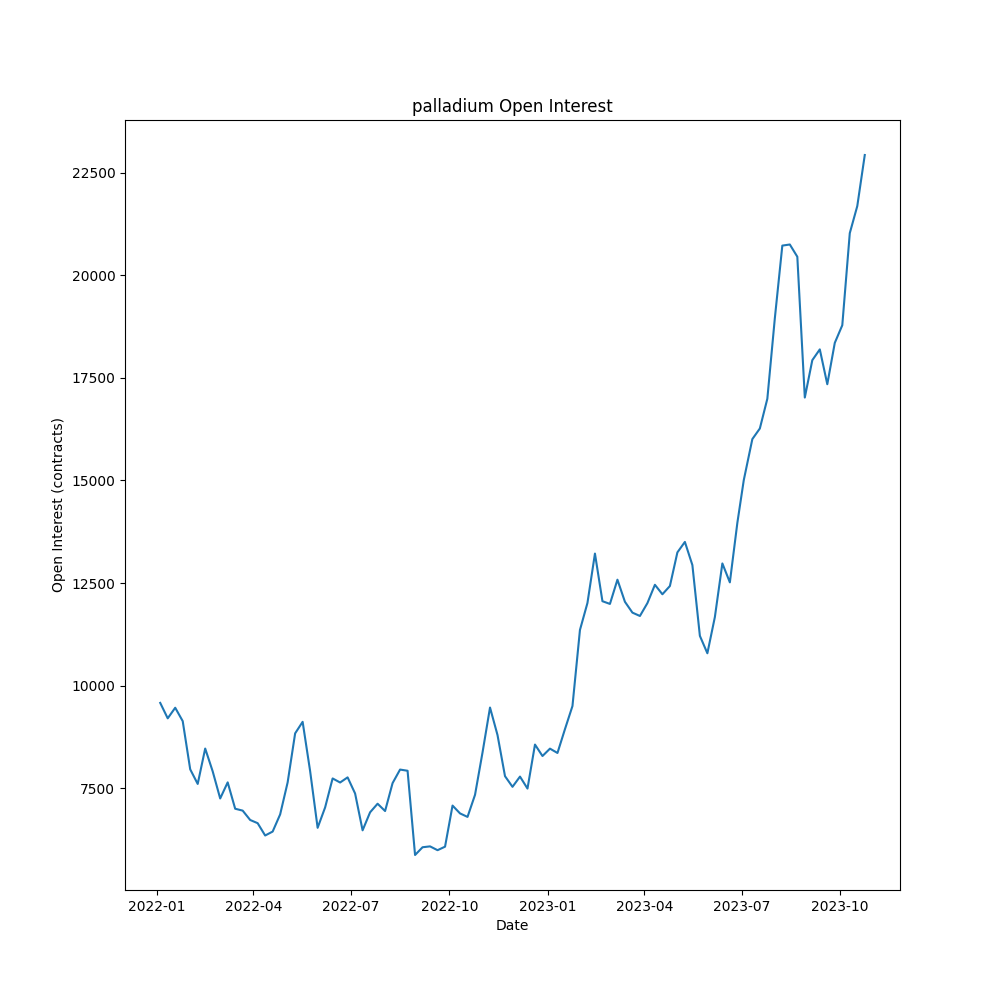

In [189]:
oi_volume_line_graph("palladium")

#### Housekeeping: Close Figures and save some memory for matplotlib graphs

In [183]:
plt.get_fignums()

[1]

In [184]:
for i in plt.get_fignums():
    plt.close(i)

### Graph showing the indexed Open Interest for a Specific Commodity

In [185]:
def index_graph (commodity_name):
    
    data = df2[df2["Market"] == commodity_name]
    
    x = data["Datetime"]
    y = data["OI_Index"]

    # Create a Plotly figure
    fig = go.Figure()

    # Add a line for the data
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines'))

    high_value = 80
    low_value = 20

    # Add horizontal lines as shapes
    fig.update_layout(shapes=[
        dict(
            type='line',
            x0=min(x),
            x1=max(x),
            y0=high_value,
            y1=high_value,
            line=dict(color='orange', dash='dash')
        ),
        dict(
            type='line',
            x0=min(x),
            x1=max(x),
            y0=low_value,
            y1=low_value,
            line=dict(color='orange', dash='dash')
        )
    ])

    # Set the title and axis labels
    fig.update_layout(
        title=f'Open Interest {commodity_name}',
        xaxis_title='Date',
        yaxis_title='OI Index',
    )

    # Show the Plotly figure
    fig.show()
    

In [186]:
index_graph('SOYBEAN OIL - CHICAGO BOARD OF TRADE')

### 7. Create Open Interest Indexed Graphs for a list of commodities

In [187]:
softs = ["cotton", r"coffee c\b", "sugar", "cocoa"]
#note this list will include more than one market where the key word is duplicated, e.g coffee

#### Indexed Graphs per Above but using Plotly

In [188]:
unique_markets


for market_name in unique_markets:
    market_data = df2[df2["Market"] == market_name]
    
    # Create a Plotly figure
    fig = go.Figure()

    # Add a scatter trace for the market data
    fig.add_trace(go.Scatter(x=market_data["Datetime"], y=market_data["OI_Index"], mode='lines', name='OI Index'))

    high_value = 80
    low_value = 20

    # Add horizontal lines as shapes
    fig.update_layout(shapes=[
        dict(
            type='line',
            x0=market_data["Datetime"].min(),
            x1=market_data["Datetime"].max(),
            y0=high_value,
            y1=high_value,
            line=dict(color='orange', dash='dash')
        ),
        dict(
            type='line',
            x0=market_data["Datetime"].min(),
            x1=market_data["Datetime"].max(),
            y0=low_value,
            y1=low_value,
            line=dict(color='orange', dash='dash')
        )
    ])

    # Set the title and axis labels
    fig.update_layout(
        title=f'Open Interest {market_name}',
        xaxis_title='Date',
        yaxis_title='OI Index',
        autosize=True
    )

    fig.show()
